# Analyzing and Preparing Data with Pandas

## Links

[Dataframe](https://https://pandas.pydata.org/pandas-docs/stable/reference/frame.html)

## Dataframes
A *Series* is  basically a column of a dataset. A *DataFrame* is a collection of Columns, so think of it as a table (with potential complex entries).



### Create DataFrame (pd.DataFrame) 

In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame( { 'GEBJAHR': [1960,1960,2000,2001],
         'NAME': ['Max', 'Huber', 'Maier', 'Huber'],
         'GROESSE': [172,160,210,230],
         'GEWICHT': [70.2, 80.2, 53.0, 92.0]
       } )


df1 = pd.DataFrame(
         np.arange(1,16).reshape(5,3), 
         index=['a', 'b', 'c', 'd', 'e'],
         columns=['c1', 'c2', 'c3'])

df2 = pd.DataFrame(
         np.random.randn(5, 3), 
         index=['a', 'b', 'c', 'd', 'e'],
         columns=['c1', 'c2', 'c3']
)

df3 = pd.DataFrame( { 'GEBJAHR': [1960,1960,2000,2001],
         'NAME': ['Max', 'Huber', 'Maier', np.nan],
         'GROESSE': [172,160,210,230],
         'GEWICHT': [70.2, 80.2, 53.0, np.nan]
       } )


#### Display  dataframes

In [0]:

# EX: Try to remove the index.. paramater. Integer indexes will be added then.
display( df) 

,c1,c2,c3
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


#### Check the size

In [3]:
df.shape


(4, 4)

#### Display columns headers (df.columns)

In [0]:
df.columns

Index(['GEBJAHR', 'NAME', 'GROESSE', 'GEWICHT'], dtype='object')

#### Datatypes


`float64` is ...

`int64` is

`object` is ...

**NOTE: Dataframes have one Datatype per Column**
If source data have several datatypes per object, you will most probably see a `object`

In [4]:
df.dtypes

GEBJAHR      int64
NAME        object
GROESSE      int64
GEWICHT    float64
dtype: object

#### Selecting rows

In [0]:
# Top rows
df.head( 2 )

,c1,c2,c3
a,1,2,3
b,4,5,6


In [0]:
# last (tail) rows
df.tail(3)

,c1,c2,c3
c,7,8,9
d,10,11,12
e,13,14,15


In [6]:

display( df3 )

display( df3.loc['a':'c'] )

,GEBJAHR,NAME,GROESSE,GEWICHT
0,1960,Max,172,70.2
1,1960,Huber,160,80.2
2,2000,Maier,210,53.0
3,2001,NaN,230,NaN


,GEBJAHR,NAME,GROESSE,GEWICHT


#### Sorting by Column

In [8]:
df1.sort_values(by='c1')

,c1,c2,c3
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


#### Selecting a single column

In [0]:
df['c2']

0   -0.507814
1   -1.724922
2   -1.011729
3    0.796294
4    0.036885
Name: c2, dtype: float64

With indexed created by Dataframe. Do not mix up with integer values.Try the next code several times, so see, hwo it works.

In [0]:
df = pd.DataFrame(
         np.random.randn(5, 3), 
         columns=['c1', 'c2', 'c3']
)
print(df)
print(df.sort_values(by='c1'))
df.sort_values(by='c1').loc[2:3]


         c1        c2        c3
0  0.778821  1.155342  1.163408
1  0.672871 -1.785728 -0.960497
2  1.472784  1.856343  0.217748
3  0.053264  1.763156  1.408657
4 -0.413882  0.875319  1.652337
         c1        c2        c3
4 -0.413882  0.875319  1.652337
3  0.053264  1.763156  1.408657
1  0.672871 -1.785728 -0.960497
0  0.778821  1.155342  1.163408
2  1.472784  1.856343  0.217748


,c1,c2,c3


#### Selecting columns based on datatypes

[Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html#pandas.DataFrame.select_dtypes)

In [0]:
df_h = df.select_dtypes(include=['int', 'float'])
display ( df_h[0:5] ) 


,GEBJAHR,GROESSE,GEWICHT
0,1960,172,70.2
1,1960,160,80.2
2,2000,210,53.0
3,2001,230,92.0


#### Filtering rows

In [0]:
filter = df['c2'] > 0

#Display the filter, if you want
#filter
dfilter = df[filter]
dfilter

,c1,c2,c3
b,0.165260,1.242515,0.990792
c,-0.227875,0.382803,-1.031548
e,-0.926005,1.433907,-1.245919


### Analyzing Data

#### Missing Data
https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html


Note:
- Missing data are by default marked with `NaN`.
- Use ` isna()` to check for missing data
- Act carefully with `fillna()` as your are changing the dataset

In [0]:
display (df3.isna() )
display( df3.dtypes )

# now fill missing values with f
#df_h = df3.fillna('x')
display( df_h )

# What is changing now?
df_h.dtypes

,GEBJAHR,NAME,GROESSE,GEWICHT
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,True,False,True


GEBJAHR      int64
NAME        object
GROESSE      int64
GEWICHT    float64
dtype: object

,GEBJAHR,NAME,GROESSE,GEWICHT
0,1960,Max,172,70.2
1,1960,Huber,160,80.2
2,2000,Maier,210,53
3,2001,x,230,x


GEBJAHR     int64
NAME       object
GROESSE     int64
GEWICHT    object
dtype: object

#### Wrong Data

Beyond missing data we might also deal with wrong data. Examples are
- a numerical columns contains a string
- a string column, where we expect only a small set of exected values (e.g. currencies) are filled with unexpexted values.

**Detection wrong data**
- Check the datatype of the column. If a numerical col hast dtype objects you have issues with data
- Do a unique check on columns with expected values


In [0]:
df_h = pd.DataFrame( { 'GEBJAHR': [1960,1960,2000,2001],
         'NAME': ['Max', 'Huber', 'Maier', np.nan],
         'GROESSE': [172,160,210,230],
         'GEWICHT': [70.2, 80.2, 53.0, np.nan]
       } )
df_h.dtypes

GEBJAHR      int64
NAME        object
GROESSE      int64
GEWICHT    float64
dtype: object

#### Stats on numerical columns

With values ranging from 1 to 100

In [0]:
df_h = pd.DataFrame(
         np.arange(1,101),
         columns=['value'])
df_h
df_h.describe()

,value
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


---

With random distributed values




In [0]:
df_h = pd.DataFrame(
         np.random.randn(10000), 
            columns=['value'])

df_h.describe()


,value
count,10000.000000
mean,-0.013286
std,0.997678
min,-3.754687
25%,-0.697590
50%,-0.014988
75%,0.669189
max,3.700483


---
With our dataframe `df3`

In [0]:
df3.describe()

,GEBJAHR,GROESSE,GEWICHT
count,4.00000,4.000000,3.000000
mean,1980.25000,193.000000,67.800000
std,23.38625,32.598568,13.757907
min,1960.00000,160.000000,53.000000
25%,1960.00000,169.000000,61.600000
50%,1980.00000,191.000000,70.200000
75%,2000.25000,215.000000,75.200000
max,2001.00000,230.000000,80.200000


#### Getting selected stat values

In [0]:
print( df3['GROESSE'].mean() )
print( df3['GROESSE'].max() )
print( df3['GROESSE'].min() )
print( df3['GROESSE'].var() )
print( df3['GROESSE'].std() )

193.0
230
160
1062.6666666666667
32.59856847572707


#### Visualization

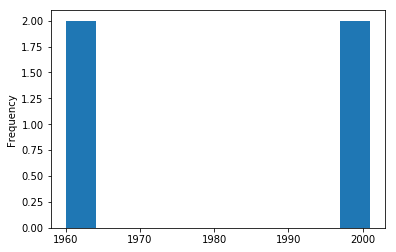

In [0]:
import matplotlib.pyplot as plt
#df.plot.hist()
df['GEBJAHR'].plot.hist()

Use more data.


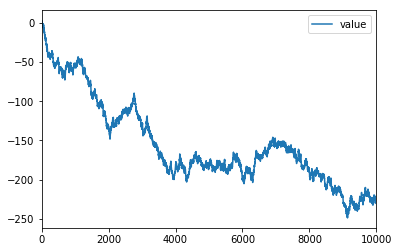

In [0]:
df_h = pd.DataFrame(
         np.random.randn(1000000), 
            columns=['value'])
#df_h.plot.hist(bins=100)
#df_h.plot()
df_h.cumsum().plot()

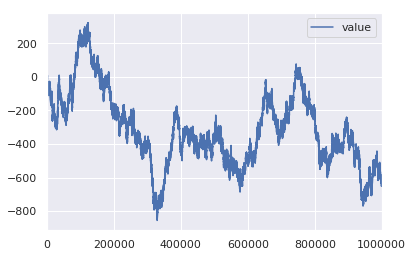

In [0]:
import seaborn as sns
sns.set()
df_h = pd.DataFrame(
         np.random.randn(1000000), 
            columns=['value'])
#df_h.plot.hist(bins=100)
#df_h.plot()
df_h.cumsum().plot()

#### Exercise: Create your own stats dataframe

In [0]:
headers = list(df.columns.values)
fields = []

for field in headers:
    zeile = {
        'name' : field,
        'mean': df[field].mean(),
        'var': df[field].var(),
        'sdev': df[field].std()
    }
    fields.append( zeile )

for field in fields:
    print(field)
    
# Make the fields list a dataframe
dfStats = pd.DataFrame( fields )
display( dfStats )

{'name': 'GEBJAHR', 'mean': 1980.25, 'var': 546.9166666666666, 'sdev': 23.386249521175188}
{'name': 'GROESSE', 'mean': 193.0, 'var': 1062.6666666666667, 'sdev': 32.59856847572707}
{'name': 'GEWICHT', 'mean': 73.85, 'var': 272.59666666666664, 'sdev': 16.510501708508638}


,mean,name,sdev,var
0,1980.25,GEBJAHR,23.386250,546.916667
1,193.00,GROESSE,32.598568,1062.666667
2,73.85,GEWICHT,16.510502,272.596667


### Changing rows or columns

#### Dropping columns or rows (df.drop)

In [0]:
import pandas as pd
data = { 'GEBJAHR': [1960,1973,2000,1000],
         'NAME': ['Max', 'Huber', 'Maier', 'Huber'],
         'GROESSE': [172,160,210,230] 
       }


# Drop a single column
df = pd.DataFrame( data )
df1 = df.drop('NAME', axis='columns');
df1

# Dropping multipe columns
df = pd.DataFrame( data )
df1 = df.drop( columns=['GROESSE','NAME'] ) 
df1

# Dropping rows
df = pd.DataFrame( data )
df1 = df.drop( [0,1] );
df1


,GEBJAHR,NAME,GROESSE
2,2000,Maier,210
3,1000,Huber,230


#### Add columns or rows (df.concat)

In [0]:
import pandas as pd
data0 = { 'GEBJAHR': [1960,1973,2000,1000],
         'NAME': ['Max', 'Huber', 'Maier', 'Huber'],
         'GROESSE': [172,160,210,230] 
       }

data1 = { 'GENDER': ['m','f', 'f'] 
       }

df0 = pd.DataFrame( data0 );
df1 = pd.DataFrame( data1 );

# Note the Nan!
df2 = pd.concat( [df0, df1], axis = 'columns');
df2

,GEBJAHR,NAME,GROESSE,GENDER
0,1960,Max,172,m
1,1973,Huber,160,f
2,2000,Maier,210,f
3,1000,Huber,230,NaN


Index is....
Columnus is...


### Normalization

In [0]:
col1 = df1['c1']
print(col1 )
print(col1.mean())
print((col1-col1.mean())/col1.std())

a     1
b     4
c     7
d    10
e    13
Name: c1, dtype: int64
7.0
a   -1.264911
b   -0.632456
c    0.000000
d    0.632456
e    1.264911
Name: c1, dtype: float64


### Convert categorial variables (df.get_dummies)


*   Columns with Numerical Values are not touched
*   Columns with non-numerical values are replaced by a column for each value in the column, A bit vector indicates if a row has this value. In short: each value of a column leads to a new column







In [0]:
import pandas as pd
data = { 'GEBJAHR': [1960,1973,2000,1000],
         'NAME': ['Max', 'Huber', 'Maier', 'Huber'],
         'GROESSE': [172,160,210,230] ,
         'GENDER': ['m','f', 'f','f'] 
       }

df = pd.DataFrame( data );
dfGender = pd.get_dummies(df['GENDER'], prefix="NAME")
dfGender


,NAME_f,NAME_m
0,0,1
1,1,0
2,1,0
3,1,0


Then you need to add  the data back to the original dataset. 

#### Exercise: Update the dataset

In [0]:
# Now drop the gender col and add the indicator col back
df = pd.DataFrame( data );
dfGender = pd.get_dummies(df['GENDER'])

#Dorop teh gender col from the dataset
df1 = df.drop('GENDER', axis=1)
df2 = pd.concat( [df1, dfGender], axis=1);
df2



,GEBJAHR,NAME,GROESSE,f,m
0,1960,Max,172,0,1
1,1973,Huber,160,1,0
2,2000,Maier,210,1,0
3,1000,Huber,230,1,0


## Read a DataFrame from a csv-file

Make sure, that you upload the file `auto-mpg.csv` to sample_data. (File can be found in GitHub/data) 

### Loading from Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Load from Colab Notebook
Make sure, that you upload the file auto-mpg.csv to sample_data in the Tab "Files". (File can be found in GitHub/data)

In [0]:
import os
import pandas as pd

df = pd.read_csv("sample_data/auto-mpg.csv", na_values=['NA','?'])

display ( df[0:5]) 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
